In [39]:
import os
from glob import glob
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
os.listdir('./')

['.gitkeep',
 '.ipynb_checkpoints',
 'BraTS18',
 'MICCAI_BraTS_2018_Data_Validation',
 'original_data',
 'visualize_data.ipynb']

In [28]:
original_brats18_path = 'original_data/BraTS18/HGG'
original_brats18_sample = os.path.join(original_brats18_path, 'Brats18_2013_2_1')

In [46]:
def plot_nifti(nifti_path, title):
    img = nib.load(nifti_path).get_fdata()
    print(img.shape)
    plt.imshow(img[:, :, img.shape[2] // 2], cmap='gray')
    plt.title(title)
    plt.axis('off')

In [47]:
# Get a list of all NIfTI files in the directory
nifti_files = [f for f in os.listdir(original_brats18_sample) if f.endswith('.nii.gz')]
nifti_files

['Brats18_2013_2_1_flair.nii.gz',
 'Brats18_2013_2_1_seg.nii.gz',
 'Brats18_2013_2_1_t1.nii.gz',
 'Brats18_2013_2_1_t1ce.nii.gz',
 'Brats18_2013_2_1_t2.nii.gz']

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)


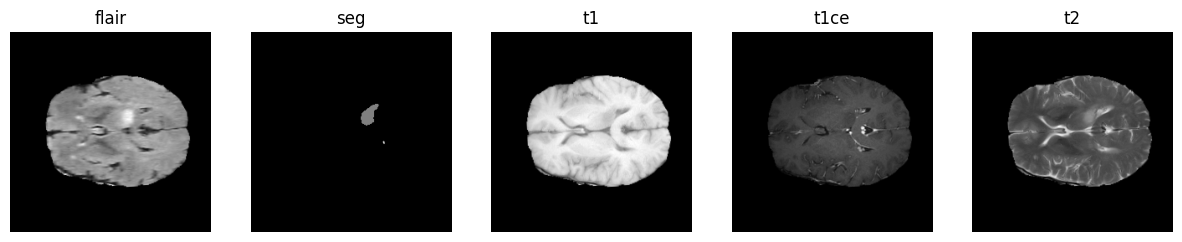

In [48]:
# Set up the subplots
num_plots = len(nifti_files)
plt.figure(figsize=(15, 3))

# Plot each NIfTI volume in a single row
for i, nifti_file in enumerate(nifti_files):
    filename = nifti_file.split('_1_')[-1].split('.')[0]
    nifti_path = os.path.join(original_brats18_sample, nifti_file)
    plt.subplot(1, num_plots, i + 1)
    plot_nifti(nifti_path, filename)

(4, 155, 200, 200)


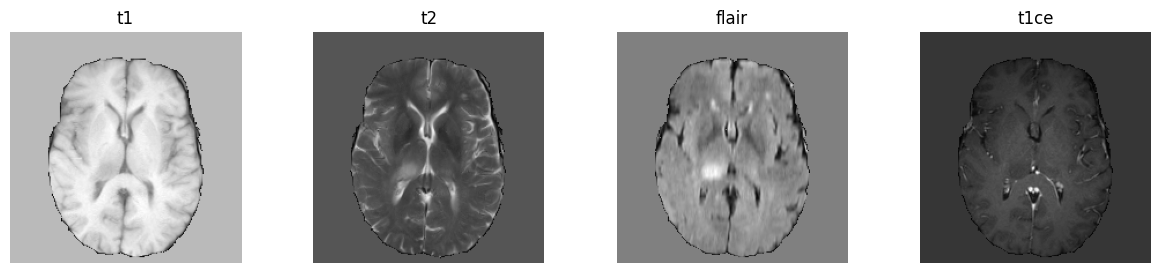

In [49]:
# Assuming original_brats18_path is defined earlier
processed_brats18_path = 'BraTS18'
processed_brats18_sample = os.path.join(processed_brats18_path, 'img_2013_2_1.npy')

# Load the NumPy array
img_data = np.load(processed_brats18_sample)

print(img_data.shape)

# Plot each of the four volumes
titles = ['t1', 't2', 'flair', 't1ce']

plt.figure(figsize=(15, 3))
for i in range(img_data.shape[0]):
    plt.subplot(1, img_data.shape[0], i + 1)
    plt.imshow(img_data[i, img_data.shape[1] // 2, :, :], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()